# IBM Attrition Analysis and Prediction



Company success depends on its employees. Most of the companies investing their employee's growth. 
When an employee decides to leave the company, much more effort needed to fill this position with someone and educate them until they became better than previous employee. That's why attrition and it's reasons to identify is important to companies. 

In this notebook, I will define factors that lead employee attrition and build a model to predict who are most likely to leave the company. 

This is a fictional dataset which is formed by IBM Data Scientists. Data can be found at :https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset



# Model Preparation

In this part of the analysis I will follow the guideline below.

Exploratory Analysis

- Data Cleaning
 - Variable types
 - Missing Values
 - Outliers

- Data Exploration

 - Univariate analysis

- Feature Engineering

 - Changing categorical variables to numeric ones

Model

In [55]:
#wider jupyter cells
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [56]:
#load libraries
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

# Data


In this case study, a HR dataset was sourced from IBM HR Analytics Employee Attrition & Performance which contains employee data for 1,470 employees with various information about the employees. I will use this dataset to predict when employees are going to quit by understanding the main drivers of employee churn.

As stated on the IBM website "This is a fictional data set created by IBM data scientists". Its main purpose was to demonstrate the IBM Watson Analytics tool for employee attrition.




In [58]:
#read dataset
hr = pd.read_csv("/Users/Tugce/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [59]:
hr.sample(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1178,20,No,Travel_Rarely,1141,Sales,2,3,Medical,1,1657,3,Female,31,3,1,Sales Representative,3,Single,2783,13251,1,Y,No,19,3,1,80,0,2,3,3,2,2,2,2
816,39,No,Non-Travel,439,Research & Development,9,3,Life Sciences,1,1132,3,Male,70,3,2,Laboratory Technician,2,Single,6782,8770,9,Y,No,15,3,3,80,0,9,2,2,5,4,0,3
39,33,No,Travel_Frequently,1141,Sales,1,3,Life Sciences,1,52,3,Female,42,4,2,Sales Executive,1,Married,5376,3193,2,Y,No,19,3,1,80,2,10,3,3,5,3,1,3


In [60]:
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [61]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

### It looks like we have 8 non-numerical variables. Let's take a close look what are these variables and how can we transform them to numerical variables. Or if they are useless, I will drop them.

In [62]:
categorical_cols = hr.dtypes[hr.dtypes == 'object']
#select object columns
dataframe = hr[categorical_cols.reset_index()['index']]
dataframe.sample(3)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
174,No,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Divorced,Y,Yes
724,No,Travel_Rarely,Research & Development,Medical,Female,Manufacturing Director,Divorced,Y,No
441,No,Travel_Frequently,Research & Development,Other,Male,Laboratory Technician,Married,Y,No


In [63]:
for item in dataframe:
    print('\n UNIQUE VALUE TOTALS \n',item)
    print(dataframe[item].nunique())
    print(dataframe[item].value_counts()) 


 UNIQUE VALUE TOTALS 
 Attrition
2
No     1233
Yes     237
Name: Attrition, dtype: int64

 UNIQUE VALUE TOTALS 
 BusinessTravel
3
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

 UNIQUE VALUE TOTALS 
 Department
3
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

 UNIQUE VALUE TOTALS 
 EducationField
6
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

 UNIQUE VALUE TOTALS 
 Gender
2
Male      882
Female    588
Name: Gender, dtype: int64

 UNIQUE VALUE TOTALS 
 JobRole
9
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director        

We want to catch employee's who are more likely to attrite.

In [64]:
hr['Target'] = pd.get_dummies(hr['Attrition'], drop_first = True) #1 = Yes, 0=no


In [65]:
#drop useless columns
hr.drop(['EmployeeNumber', 'EmployeeCount','StandardHours'],1, inplace=True)


## Missing Values

In [66]:
missing_values = hr.isnull().sum().any()
missing_values

False

We don't have any missing values! yay! 

## Feature Enginnering & Data Exploration

I will use plotly library to have a better understanding of our futures.

- official page : https://plotly.com/python/bar-charts/
- colors : https://plotly.com/python/discrete-color/
- tutorial : https://www.journaldev.com/19692/python-plotly-tutorial

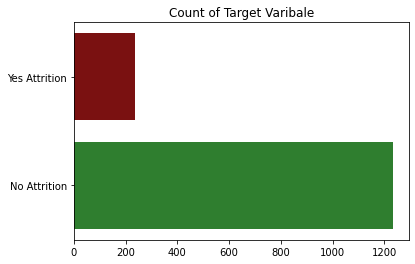

In [67]:
import seaborn as sns

#make datasest

yes_attrition = hr[hr['Attrition'] == 'Yes']['Attrition'].count()
no_attrition = hr[hr['Attrition'] == 'No']['Attrition'].count()

#assign colors to palette
my_pal = {"Yes Attrition": "darkred", "No Attrition": "forestgreen"}

#draw barplot
ax = sns.barplot(x = (yes_attrition,no_attrition) , y= ['Yes Attrition', 'No Attrition'], palette = my_pal)

#give title
plt.title("Count of Target Varibale")
plt.show()
#plt.subplots_adjust(top=1)




- Among 1470 workers 237 (%16) left the company.

Variable by variable I plot the histograms and try to find a relationship between each variable and attrition.

In [68]:
numerical_cols = hr.select_dtypes(include=['int64', 'uint8'])#.columns.tolist()
#drop useless columns for histogram
hist_list = numerical_cols.drop(['DailyRate','MonthlyIncome','MonthlyRate','Target'],1)
hist_list = hist_list.columns.tolist()

In [69]:
#load libraries
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.express as px

In [70]:
def plotly_barplot_maker(col):

    yes_attrition = hr[hr['Attrition'] == 'Yes']
    no_attrition = hr[hr['Attrition'] == 'No']

    val_table = pd.DataFrame(pd.crosstab(hr[col],hr['Target']))
    val_table['Attr%'] = val_table[1] / (val_table[1] + val_table[0]) * 100

#Create traces

#Histogram for yes_attrition
    trace0 = go.Bar(
        x = yes_attrition[col].value_counts().keys().tolist(),
        y = yes_attrition[col].value_counts().values.tolist(),
    #mode = 'markers',
        name = 'Yes_attrition',
        marker = dict(color=px.colors.qualitative.Bold[6], line=dict(width=1))
)

#Histogram for no_attrition
    trace1 = go.Bar(
        x = no_attrition[col].value_counts().keys().tolist(),
        y = no_attrition[col].value_counts().values.tolist(),
    #mode = 'markers',
        name = 'No_attrition' ,
        marker = dict(color=px.colors.qualitative.Bold[5], line=dict(width=1))
)

#Line for attr%
    trace2 =  go.Scatter(   
            x=val_table.index,
            y=val_table['Attr%'],
            yaxis = 'y2',
            name='% Attrition', opacity = 0.6, marker=dict(
            color='black',
            line=dict(color='#000000',width=0.5
        )))

    layout =  dict(title =  str(col),
              title_x=0.5,
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= 'Attrition %'
                         ))


    fig = go.Figure(data=[trace0, trace1, trace2], layout = layout)
    fig.layout.plot_bgcolor = '#fff'
    py.iplot(fig)

In [71]:
for cols in hist_list:
    plotly_barplot_maker(cols)

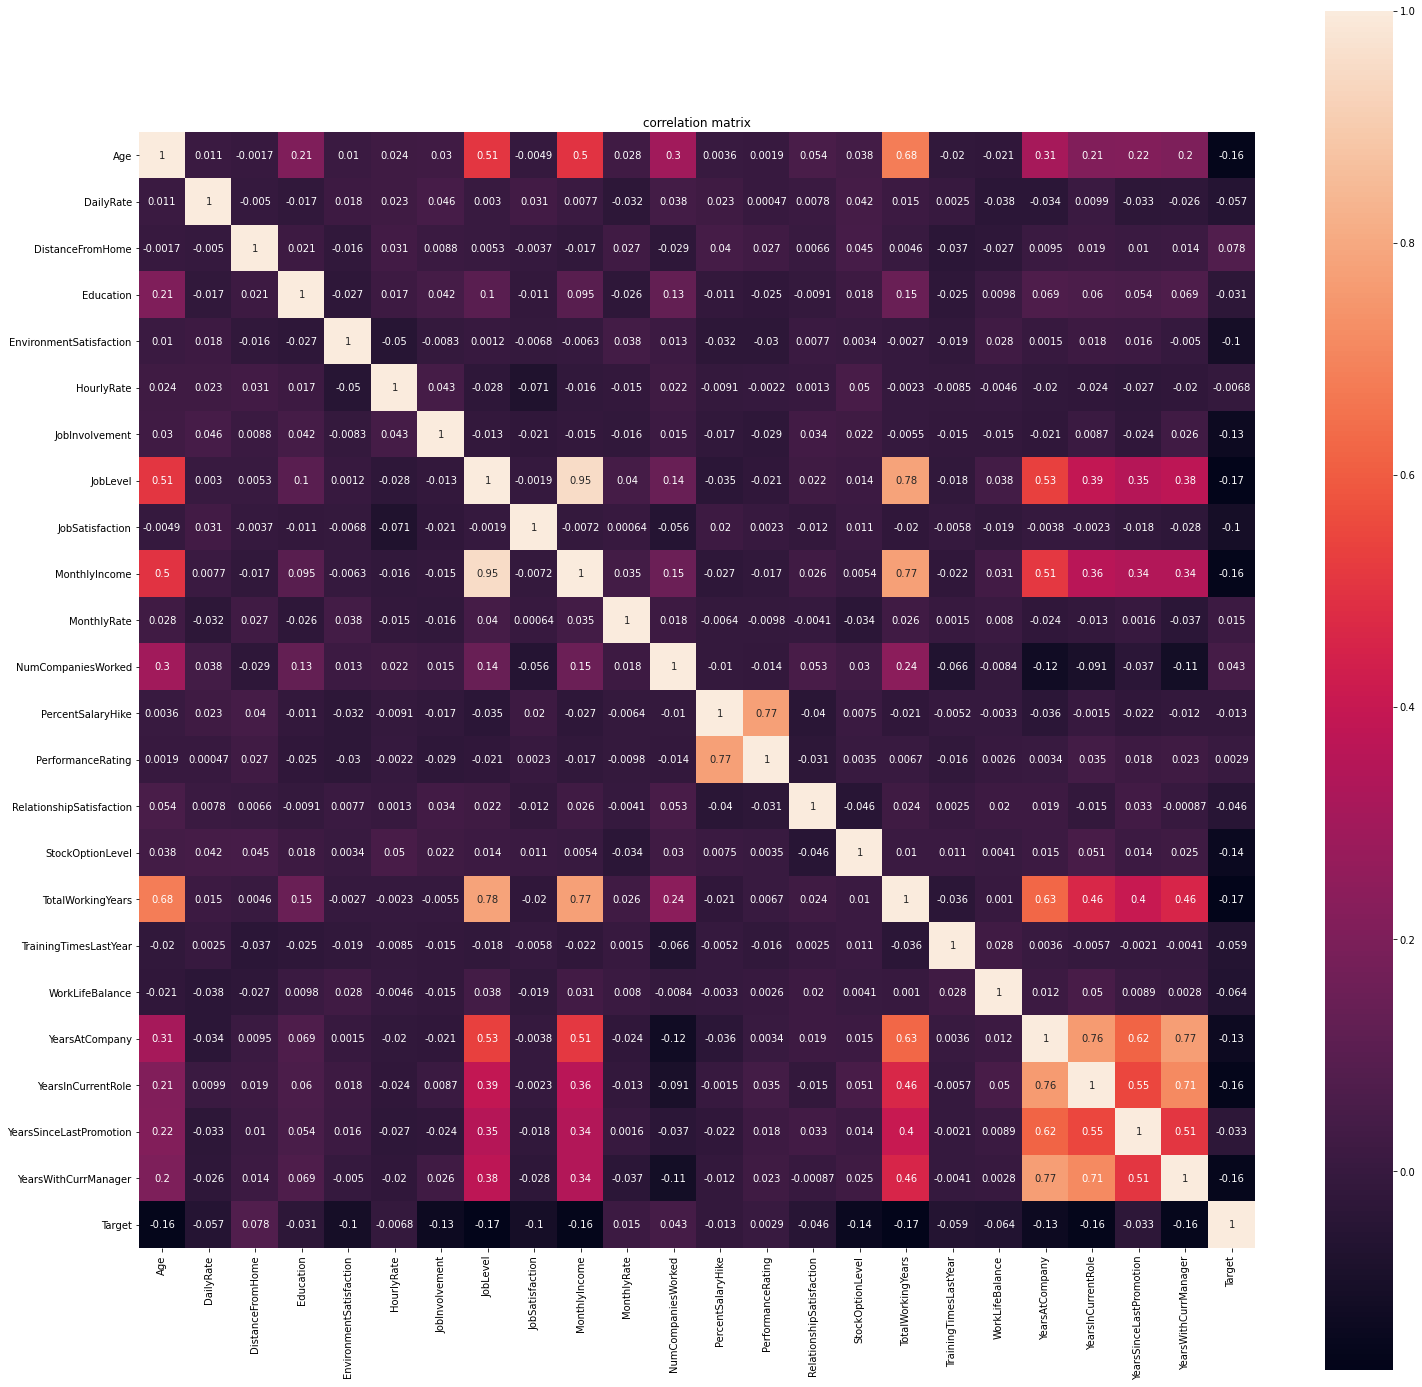

In [72]:
import seaborn as sns
plt.figure(figsize=(25,25))
sns.heatmap(hr.corr(), square=True, annot=True)
plt.title("correlation matrix")
plt.show()

- Age is correlated with Total Working Years variable.
- Job level is correlated with years at company, total working years, age and monthly income.
- Performance rating is correlated with percent salary hike
- Years in current role is correlated with years at company, years since last promotion and years with current manager. 


Age variable is normally distributed and it has almost same correlation value with attrition.
Percent Salary Hike
Years in current role

In [73]:
drop_cols = ['TotalWorkingYears', 'JobLevel', 'YearsAtCompany', 'MonthlyIncome','PerformanceRating','NumCompaniesWorked','YearsAtCompany', 'YearsInCurrentRole',
               'YearsSinceLastPromotion','Attrition']
hr1 = hr.drop(drop_cols,1)

In [74]:
hr1.sample(3) #15 numeric columns

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,Over18,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsWithCurrManager,Target
1049,30,Travel_Rarely,1358,Sales,16,1,Life Sciences,4,Male,96,3,Sales Executive,3,Married,2939,Y,No,15,3,2,2,2,2,0
1281,35,Travel_Rarely,303,Sales,27,3,Life Sciences,3,Male,84,3,Sales Executive,4,Single,13492,Y,Yes,18,4,0,2,3,7,1
877,46,Travel_Rarely,150,Research & Development,2,4,Technical Degree,4,Male,60,3,Manufacturing Director,4,Divorced,17433,Y,No,11,3,1,3,2,4,0


## Categorical Columns

In [75]:
#A list with object variables 
categoric_col = hr1.columns[hr1.dtypes == 'object']
categoric_col

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [76]:
x = hr1[categoric_col]

for item in x:
    print('\n UNIQUE VALUE TOTALS \n',item)
    print(x[item].nunique())
    print(x[item].value_counts()) 


 UNIQUE VALUE TOTALS 
 BusinessTravel
3
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

 UNIQUE VALUE TOTALS 
 Department
3
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

 UNIQUE VALUE TOTALS 
 EducationField
6
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

 UNIQUE VALUE TOTALS 
 Gender
2
Male      882
Female    588
Name: Gender, dtype: int64

 UNIQUE VALUE TOTALS 
 JobRole
9
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

 UNIQUE VALUE TOTALS

In [77]:
plotly_barplot_maker('BusinessTravel')
plotly_barplot_maker('Gender')
plotly_barplot_maker('OverTime')

In [78]:
def pie_plotly(col):
    val_table = pd.DataFrame(pd.crosstab(hr[col],hr['Target']))
    val_table['Attr%'] = val_table[1] / (val_table[1] + val_table[0]) * 100
    val_table = val_table.reset_index()
    fig = px.pie(val_table, values='Attr%', names=col, title=col)
    fig.show()

In [79]:
pie_plotly('Department')
pie_plotly('EducationField')
pie_plotly('JobRole')
pie_plotly('MaritalStatus')

- Department and Job Role columns are representing same field. I will drop one of them.
- Attrition % doesn't change with the education field and Over18. I won't use those column.

In [80]:
drop_categorical_cols = ['JobRole', 'Over18']
hr2 = hr1.drop(drop_categorical_cols,1)

In [81]:
hr2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
Age                         1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyRate                 1470 non-null int64
OverTime                    1470 non-null object
PercentSalaryHike           1470 non-null int64
RelationshipSatisfaction    1470 non-null int64
StockOptionLevel            1470 non-null int64
TrainingTimesLastYear  

In [82]:
hr3 = hr2.select_dtypes(include='object')

In [83]:
for col in hr3.columns:
    x = pd.get_dummies(hr[col], drop_first = True)
    hr2 = pd.concat([hr2,x], axis = 1)
    hr2.drop(col,1,inplace = True)

In [84]:
hr2['OverTime'] = hr2['Yes']
hr2.drop('Yes',1,inplace=True)

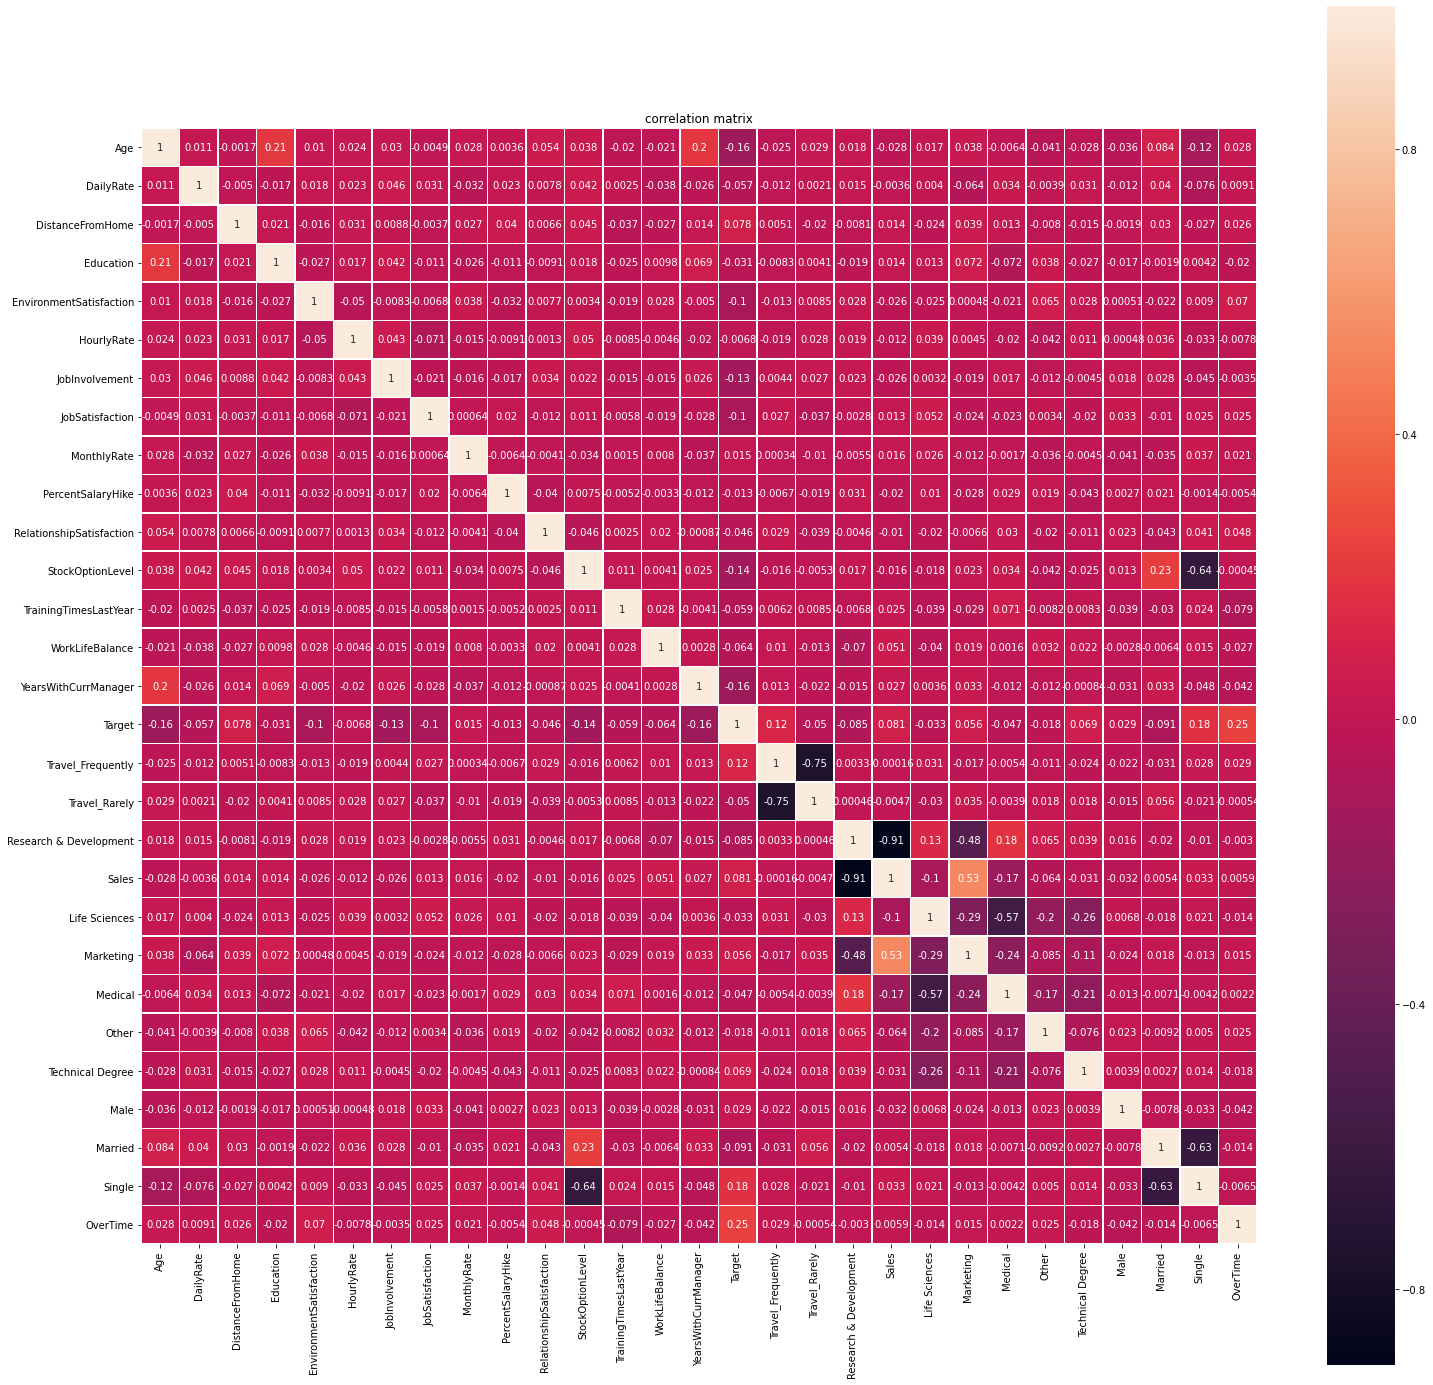

In [85]:
plt.figure(figsize=(25,25))
sns.heatmap(hr2.corr(), square=True, annot=True, linewidths=.5)
plt.title("correlation matrix")
plt.show()

-Singe, Medical, Research&Development, Travel_Rarely, Marketing columns are correlated.

In [86]:
hr3 = hr2.drop(['StockOptionLevel','Married', 'Medical','Research & Development', 'Travel_Rarely', 'Marketing'],1)

### EDA Conclusion

Let's summarise the findings from this EDA:

The dataset does not feature any missing or erroneous data values, and all features are of the correct data type.
The strongest positive correlations with the target features are: Performance Rating, Monthly Rate, Num Companies Worked, Distance From Home.
The strongest negative correlations with the target features are: Total Working Years, Job Level, Years In Current Role, and Monthly Income.
The dataset is imbalanced with the majoriy of observations describing Currently Active Employees.
Several features (ie columns) are redundant for our analysis, namely: EmployeeCount, EmployeeNumber, StandardHours, and Over18.
Other observations include:

Single employees show the largest proportion of leavers, compared to Married and Divorced counterparts.
About 10% of leavers left when they reach their 2-year anniversary at the company.
Loyal employees with higher salaries and more responsbilities show lower proportion of leavers compared to their counterparts.
People who live further away from their work show higher proportion of leavers compared to their counterparts.
People who travel frequently show higher proportion of leavers compared to their counterparts.
People who have to work overtime show higher proportion of leavers compared to their counterparts.
Employee who work as Sales Representatives show a significant percentage of Leavers in the submitted dataset.
Employees that have already worked at several companies previously (already "bounced" between workplaces) show higher proportion of leavers compared to their counterparts.

# Model

In [87]:
# all imports in one place for convenience
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups_vectorized
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [88]:
Y = hr3['Target']
X = hr3.drop('Target',1)

### Standarize features

The regularization penalty is comprised of the sum of the absolute value of the coefficients, we need to scale the data so the coefficients are all based on the same scale.

In [89]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [90]:
#split data into train and test sets where 20% of the data resides in the test set.

X_train, X_test, y_train, y_test = train_test_split(X_std,Y, test_size = 0.2, random_state = 465 )

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1176, 22), (294, 22), (1176,), (294,))

In [91]:
lr = LogisticRegression(solver='lbfgs', penalty='none')
lr.fit(X_train, y_train)

test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.8784013605442177
Score on test data:  0.8503401360544217


Here we see a better score on the training data than the test data. This may indicate that some overfitting is happening. One way to combat overfitting is to use regularization. Regularization has the effect of reducing the variance between coefficients. This means the model does not fit the training data quite as well but should generalize to unseen data better.

In [92]:
lr_regularized = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000)
lr_regularized.fit(X_train, y_train)

test_score = lr_regularized.score(X_test, y_test)
train_score = lr_regularized.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.8775510204081632
Score on test data:  0.8503401360544217


## Choosing parameter C


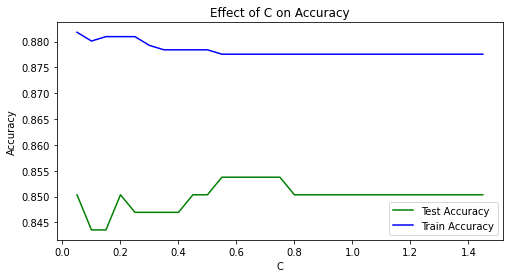

In [93]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(solver='lbfgs', penalty='l2', C=c, max_iter=10000)
  lr.fit(X_train, y_train)
  test_accuracy.append(lr.score(X_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

It looks like best accuracy achieved when C is between 0.6 and 0.8.

In [94]:
lr_regularized = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000)
lr_regularized.fit(X_train, y_train)

test_score = lr_regularized.score(X_test, y_test)
train_score = lr_regularized.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.8775510204081632
Score on test data:  0.8503401360544217


In [95]:
lr_regularized = LogisticRegression(solver='liblinear', C = 0.6)
lr_regularized.fit(X_train, y_train)

test_score = lr_regularized.score(X_test, y_test)
train_score = lr_regularized.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.8775510204081632
Score on test data:  0.8503401360544217


## Analyzing Model Performance

In [96]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

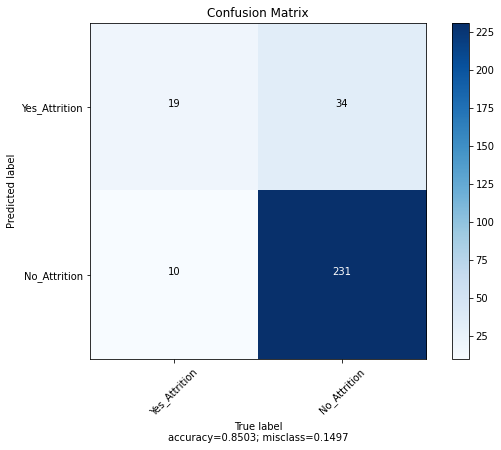

In [97]:
predictions = lr.predict(X_test)

confusion = confusion_matrix(y_test, predictions, labels=[1, 0])

plot_confusion_matrix(cm=confusion, target_names = ['Yes_Attrition', 'No_Attrition'], title = 'Confusion Matrix',normalize=False)

In [98]:
cv_scores = cross_val_score(lr_regularized, X_std, Y, cv = 5)
print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validatiion score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.87457627 0.87118644 0.86734694 0.85665529 0.89419795]
Mean cross validatiion score: 0.873


Based on the scores, the model is able to predict consistently high on all 5 folds of the dataset. This gives us assurance that the model is performing well on unseen data multiple times and it was not just by luck of the draw during the initial data split.

# 2. Ensemble Modeling - Random Forest Classifier

In [99]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [100]:
rfc = ensemble.RandomForestClassifier()
# Create random forest classifer object that uses entropy
clf = RandomForestClassifier(criterion='entropy', random_state=0, n_jobs=-1)
cv_scores = cross_val_score(rfc, X_std, Y, cv=5)
print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validatiion score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.85762712 0.82711864 0.84353741 0.86006826 0.84641638]
Mean cross validatiion score: 0.847


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



# 3. Support Vector Classifiers

In [101]:
# Load libraries
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

In [102]:
# Create support vector classifier
svc = LinearSVC(C=1.0)

# Train model
cv_scores = cross_val_score(svc, X_std, Y, cv=5)
print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validatiion score: {:.3f}'.format(np.mean(cv_scores)))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Accuracy scores for the 5 folds:  [0.85084746 0.86440678 0.88095238 0.85324232 0.87030717]
Mean cross validatiion score: 0.864


# 4. Gradient Boosting

In [103]:
from sklearn.ensemble import GradientBoostingClassifier

In [104]:
# evaluate the model
model = GradientBoostingClassifier()
cv_scores = cross_val_score(model, X_std, Y, scoring='accuracy', n_jobs=-1, error_score='raise')
print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validatiion score: {:.3f}'.format(np.mean(cv_scores)))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



Accuracy scores for the 5 folds:  [0.84489796 0.85918367 0.85102041]
Mean cross validatiion score: 0.852


# 5. XGboost

tutorial : https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/

In [105]:
import xgboost
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [106]:
xg_reg = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 4, n_estimators = 100)

In [107]:
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.37%


In [108]:
xgb_cfl = XGBClassifier(n_jobs = -1)


# A parameter grid for XGBoost
params = {
        'n_estimators' : [100, 200, 500, 750],
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5
param_comb = 800

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state=42)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 21.6min


KeyboardInterrupt: 

In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
#results.to_csv('xgb-random-grid-search-results-01.csv', index=False)

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Model Comparision

- When I compare different model's cross validation results, linear regression has highest accuracy (%87). 


In [ ]:
import sklearn

In [ ]:
# get importance
importance = lr_regularized.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
feature_importance = abs(lr_regularized.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(12,8))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=11)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()  
plt.show()

# Conclusion

Overt

- Over Time: Over Time is our most dominant feature. If people work more over time they are more likely to attire.
- Single, Male : If employee is single they are more likely to attire. Socially, they don't have dependants that's why it is easy to make a decision about leaving the work.    
- Years With Current Manager : More time with the same manager could increase the team feeling, they have an inverse impact on attrition.
- Travel Frequently: This is an interesting feature. Traveling can be tiring and effect employee's choices.
